In [1]:
import pandas as pd
import csv
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import random as rd
import matplotlib

M_Stat = pd.read_csv('D:/NCI - Database and Analytical Programming/Project/Mars_Statistics.csv')

In [2]:
M_Statdf = pd.DataFrame(M_Stat)

In [3]:
M_Statdf['Relative Humidity'] = M_Statdf['Relative Humidity (%)']/100

In [4]:
M_Statdf['Vapour Pressure (mB)'] = M_Statdf['Water Partial Pressure (mB)'] / M_Statdf['Relative Humidity']

In [5]:
M_Statdf.dtypes

Deep Space Network Station (DSN)      int64
Year                                  int64
DOY                                   int64
Time_Minute                           int64
Dew Point (°C)                      float64
Surface Air Temp (°C)               float64
Surface pressure (mB)               float64
Water Partial Pressure (mB)         float64
Relative Humidity (%)                 int64
Mars True Local Solar Time          float64
Sol                                 float64
Solar_Longitude_LS                  float64
Relative Humidity                   float64
Vapour Pressure (mB)                float64
dtype: object

In [6]:
M_Statdf.fillna(M_Statdf.mean(), inplace=True)

In [7]:
M_Statdf.drop_duplicates(subset = ["DOY","Mars True Local Solar Time"], keep = 'first' , inplace = True) 

In [8]:
M_Statdf = M_Statdf.sort_values(['DOY','Mars True Local Solar Time'], ascending= [True, True])

In [9]:
M_Statdf = M_Statdf.drop(M_Statdf.columns[3], axis= 1)

In [13]:
M_Statdf = M_Statdf.drop(M_Statdf.columns[8], axis= 1)

In [14]:
M_Statdf = M_Statdf[M_Statdf.DOY < 345]

In [23]:
M_Stat2df = M_Statdf.drop_duplicates(subset = "DOY", keep = 'first' , inplace = False) 

In [24]:
M_Stat2df

,Deep Space Network Station (DSN),Year,DOY,Dew Point (°C),Surface Air Temp (°C),Surface pressure (mB),Water Partial Pressure (mB),Relative Humidity (%),Sol,Solar_Longitude_LS,Relative Humidity,Vapour Pressure (mB)
953287,10,2019,1,-15.9,6.6,899.9,1.9,19,35.000000,316.490000,0.19,10.000000
989374,10,2019,2,-19.5,5.4,906.9,1.4,15,36.000000,317.080000,0.15,9.333333
1015318,10,2019,3,-14.2,7.4,909.0,2.1,20,37.000000,317.670000,0.20,10.500000
1038985,10,2019,4,-10.3,10.9,907.2,2.9,22,38.000000,318.250000,0.22,13.181818
1064929,10,2019,5,-11.3,12.3,902.9,2.7,18,39.000000,318.840000,0.18,15.000000
1301431,10,2019,6,-3.1,9.0,900.5,5.0,43,40.000000,319.690000,0.43,11.627907
1438626,10,2019,7,-2.9,11.2,901.9,5.1,37,41.000000,320.010000,0.37,13.783784
1465550,10,2019,8,4.3,14.9,907.5,8.4,49,42.000000,320.590000,0.49,17.142857
1491494,10,2019,9,1.7,12.0,906.8,7.0,49,43.000000,321.170000,0.49,14.285714
1520796,10,2019,10,0.7,16.1,904.8,6.5,35,44.000000,321.750000,0.35,18.571429


In [26]:
M_Stat2df.to_csv('Mars_Stat_Processed_1.csv', index= False)

Text(0.5, 1.0, 'Variation in relative humidity(%)\n on Mars in one day')

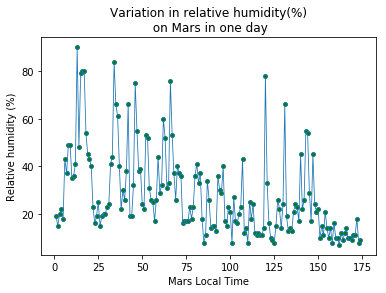

In [32]:
##1st Plot 

matplotlib.rcParams['agg.path.chunksize'] = 10000
plt.plot('DOY', 'Relative Humidity (%)', data = M_Stat2df, linewidth = 0.8,  marker='o', markerfacecolor='green', markersize= 4)
plt.xlabel('Day of year')
plt.ylabel('Relative humidity (%)')
plt.title('Variation in relative humidity(%)\n on Mars', multialignment = 'center')

Text(0.5, 1.0, 'Variation in Pressures\n on Mars')

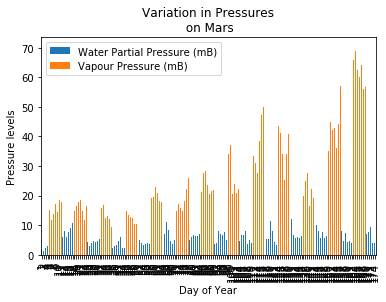

In [34]:
##2nd PLot

M_Statdf.plot(x="DOY", y=["Water Partial Pressure (mB)", "Vapour Pressure (mB)"], kind="bar")
plt.xlabel('Day of Year')
plt.ylabel('Pressure levels')
plt.title('Variation in Pressures\n on Mars', multialignment = 'center')

<Figure size 432x288 with 0 Axes>

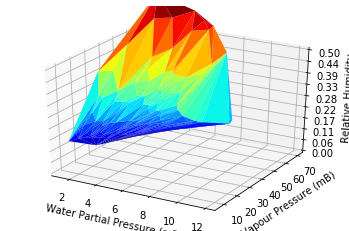

In [58]:
##3rd Plot

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator as ll
from matplotlib.ticker import FormatStrFormatter as fsf

fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax = plt.figure().gca(projection='3d')
#ax = plt.axes(projection = '3d')

#Plotting the graph
surf = ax.plot_trisurf(M_Stat2df['Water Partial Pressure (mB)'], M_Stat2df["Vapour Pressure (mB)"], M_Stat2df["Relative Humidity"], cmap= plt.cm.jet,
                       linewidth= 1)
ax.set_xlabel('Water Partial Pressure (mB)')
ax.set_ylabel('Vapour Pressure (mB)')
ax.set_zlabel('Relative Humidity')

#Customizing Z axis
ax.set_zlim(0,0.5)
ax.zaxis.set_major_locator(ll(10))
ax.zaxis.set_major_formatter(fsf('%.02f'))

# rotate the axes and update
#for angle in range(0, 360):
 #   ax.view_init(30, 40)

#plt.show()

#Adding values to color
#fig.colorbar(surf, shrink=0.5, aspect=5)

# rotate the axes and update
#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.05)


Text(0.5, 1.0, 'Variation in Temperature (°C)\n on Mars')

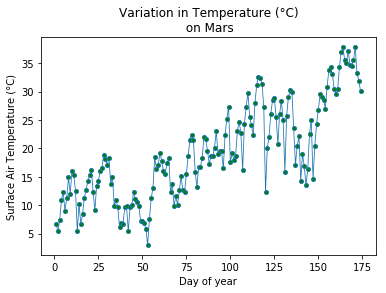

In [60]:
## 4th Plot

matplotlib.rcParams['agg.path.chunksize'] = 10000
plt.plot(M_Stat2df['DOY'], M_Stat2df['Surface Air Temp (°C)'], linewidth = 0.8,  marker='o', markerfacecolor='green', markersize= 4)
plt.xlabel('Day of year')
plt.ylabel('Surface Air Temperature (°C)')
plt.title('Variation in Temperature (°C)\n on Mars', multialignment = 'center')

In [68]:
##5th Plot



<Figure size 432x288 with 0 Axes>

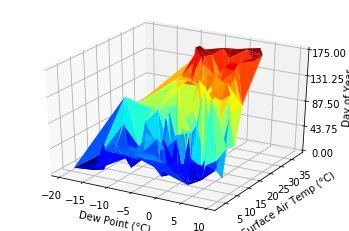

In [78]:
##6th PLot

fig1 = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax1 = plt.figure().gca(projection='3d')
#ax = plt.axes(projection = '3d')

#Plotting the graph
surf1 = ax1.plot_trisurf(M_Stat2df['Dew Point (°C)'], M_Stat2df["Surface Air Temp (°C)"], M_Stat2df["DOY"], cmap= plt.cm.jet,
                       linewidth= 1)
ax1.set_xlabel('Dew Point (°C)')
ax1.set_ylabel('Surface Air Temp (°C)')
ax1.set_zlabel('Day of Year')

#Customizing Z axis
ax1.set_zlim(0,175)
ax1.zaxis.set_major_locator(ll(5))
ax1.zaxis.set_major_formatter(fsf('%.02f'))

Text(0.5, 1.0, 'Variation in Pressure (mB)\n on Mars')

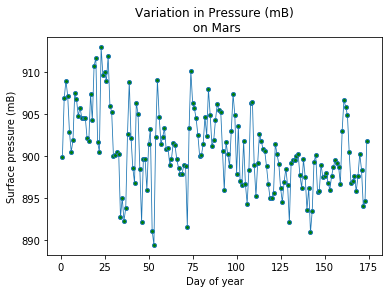

In [76]:
##7th Plot

matplotlib.rcParams['agg.path.chunksize'] = 10000
plt.plot(M_Stat2df['DOY'], M_Stat2df['Surface pressure (mB)'], linewidth = 0.8,  marker='o', markerfacecolor='green', markersize= 4)
plt.xlabel('Day of year')
plt.ylabel('Surface pressure (mB)')
plt.title('Variation in Pressure (mB)\n on Mars', multialignment = 'center')

<Figure size 432x288 with 0 Axes>

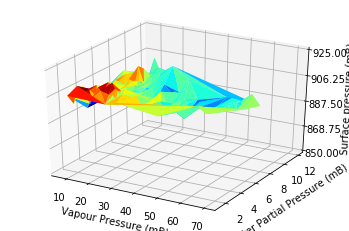

In [82]:
##8th PLot

fig2 = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax2 = plt.figure().gca(projection='3d')
#ax = plt.axes(projection = '3d')

#Plotting the graph
surf2 = ax2.plot_trisurf(M_Stat2df["Vapour Pressure (mB)"], M_Stat2df["Water Partial Pressure (mB)"], M_Stat2df["Surface pressure (mB)"], cmap= plt.cm.jet,
                       linewidth= 1)
ax2.set_xlabel('Vapour Pressure (mB)')
ax2.set_ylabel('Water Partial Pressure (mB)')
ax2.set_zlabel('Surface pressure (mB)')

#Customizing Z axis
ax2.set_zlim(850,925)
ax2.zaxis.set_major_locator(ll(5))
ax2.zaxis.set_major_formatter(fsf('%.02f'))